In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_blobs(n_samples=10000,n_features=2,centers=4,random_state=42)

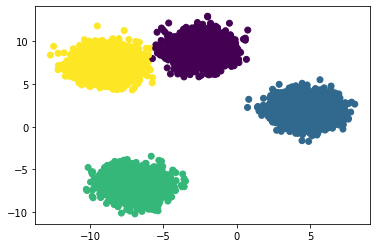

In [3]:
plt.scatter(X[:,0],X[:,1],c = y)

In [4]:
y_hot = OneHotEncoder().fit_transform(y.reshape(-1,1)).todense()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.2, random_state=42)

In [6]:
model = Sequential()
model.add(Dense(50,input_shape = (2,),activation='sigmoid',name = 'l1'))
model.add(Dense(25,activation='sigmoid',name='l2'))
model.add(Dense(10,activation='sigmoid',name='l3'))
model.add(Dense(4,activation='softmax',name='l4'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 50)                150       
_________________________________________________________________
l2 (Dense)                   (None, 25)                1275      
_________________________________________________________________
l3 (Dense)                   (None, 10)                260       
_________________________________________________________________
l4 (Dense)                   (None, 4)                 44        
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
outcome = model.fit(X_train,y_train,epochs=10)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 50us/sample - loss: 0.0143 - accuracy: 0.9996
Epoch 2/10
8000/8000 [==============================] - 0s 54us/sample - loss: 0.0120 - accuracy: 0.9996
Epoch 3/10
8000/8000 [==============================] - 0s 51us/sample - loss: 0.0100 - accuracy: 0.9998
Epoch 4/10
8000/8000 [==============================] - 0s 51us/sample - loss: 0.0089 - accuracy: 0.9996
Epoch 5/10
8000/8000 [==============================] - 0s 56us/sample - loss: 0.0076 - accuracy: 0.9996
Epoch 6/10
8000/8000 [==============================] - 0s 50us/sample - loss: 0.0067 - accuracy: 0.9996
Epoch 7/10
8000/8000 [==============================] - 0s 55us/sample - loss: 0.0059 - accuracy: 0.9995
Epoch 8/10
8000/8000 [==============================] - 0s 56us/sample - loss: 0.0052 - accuracy: 0.9998
Epoch 9/10
8000/8000 [==============================] - 0s 51us/sample - loss: 0.0048 - accuracy: 0.9996
Epoch 10/10
8000/8000 [==========

In [23]:
model.evaluate(X_test,y_test)

2000/2000 [==============================] - 0s 34us/sample - loss: 0.0036 - accuracy: 0.9995


[0.003574578087776899, 0.9995]

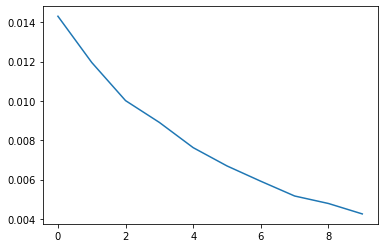

In [26]:
plt.plot(outcome.history['loss'])

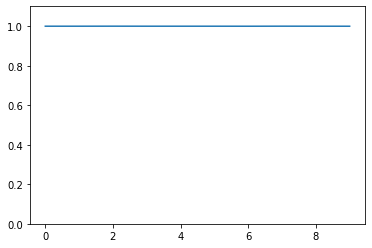

In [29]:
plt.figure()
plt.plot(outcome.history['accuracy'])
plt.ylim(0,1.1)
plt.show()